# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Nima Khodaveisi
2.   Student Number: 98110146


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [22]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error 

# I need it for exp function
import math

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [7]:
dataset = pd.read_csv("./data/data01.csv")


# implement the split part
# name them: x_train, x_test, y_train, y_test


msk = np.random.rand(len(dataset)) < 0.8 

x_train = dataset[msk]['X']
y_train = dataset[msk]['Y']

x_test = dataset[msk == False]['X']
y_test = dataset[msk == False]['Y']

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [8]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.ones((x_train.shape[0], 2))
A[:, 0] = x_train.to_numpy()
y = np.array(y_train.to_numpy())

m = np.linalg.inv(A.T @ A) @ A.T @ y

print(m)


[-1.00981339  0.80027141]


In [9]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.34297508183653863
MSE test error: 0.2704711917398456


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

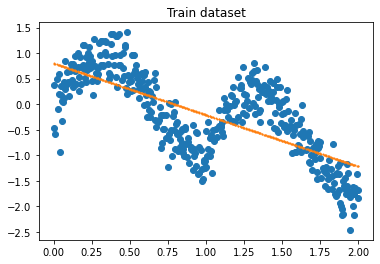

In [10]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

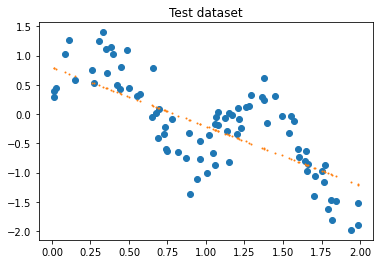

In [11]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

The reported accuracy is not acceptable because as we can see in the plots, the data is not linear. For instance, if the range of x is between 0.25 to 0.30 our line is far away from the true result. 

I think we should try more complex models. I think we can fit the model with a 3 degree model (not linear or not 2 degree). Because it's very close to what 3 degree curves are. 

The main problems here is that are data is not linear at all and has lots of ups and downs which make it hard to fit a good linear model. We should look for more complex model to achieve this matter. We can try locally weighted linear regression because our model seems linear in local areas. 

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

-write here-

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [56]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        d = (xi - the_query_point)
        W[i, i] = math.exp(-(d @ d.T) / (2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [75]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X.to_numpy().reshape(-1, 1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ train_Y)

    return np.dot(qx, theta.T)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [124]:
predicted_test = [predict(x_train, y_train, query, 0.007) for query in x_test]

print(y_test.shape)
pred_test_np = np.array(predicted_test).reshape(-1,)

error = mean_squared_error(y_test, pred_test_np)
print(f"MSE test error: {error}")

(85,)
MSE test error: 0.09337409079345825


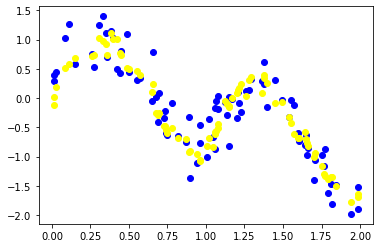

In [125]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, the performance is much better. The reason is our data has lots of locally ups and downs and therefore, if we add local weights to our model we can predict much better. 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

I think KNN is a good approach for this problem as well. The reason is if we look at local areas in our data, specially if we fix some point x and then have a look at its neighbours, we see that the y of that point is almost the average of its neighbours. 

### Part10:
Implementing the `KNN model`.

In [193]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.sqrt((x1 - x2) ** 2)
        return distance

    def return_nn_ids(self, x):
        distances = self.X.apply(lambda train_x: self.distance(x, train_x))
        distances = distances.sort_values()
        indices = distances.index[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices].sum() / self.k
        return predicted_y

In [194]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    print(np.array(predicted_y).shape)
    error = mean_squared_error(y_test, np.array(predicted_y))
    return error, predicted_y

In [209]:
k = 4
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

(85,)
MSE error of KNN for test dataset: 0.09206422805891756


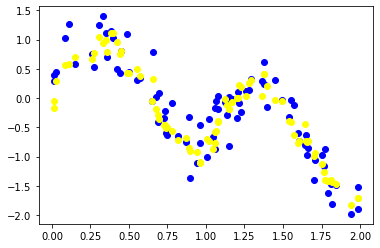

In [210]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, as we expected the accuracy is high (about 92%) which is a good accuracy in this problem. 